# Data Science & Business Analytics Tasks
### GRIPTASK  - 1  

● Predict the percentage of an student based on the no. of study hours.


● linear regression task as it involves just 2 variables.

In [21]:
import urllib.request
# open a connection to a URL using urllib
webUrl  = urllib.request.urlopen('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

#get the result code and print it
print ("result code: " + str(webUrl.getcode()))

# read the data from the URL and print it
data = webUrl.read()
print (data)

result code: 200
b'Hours,Scores\r\n2.5,21\r\n5.1,47\r\n3.2,27\r\n8.5,75\r\n3.5,30\r\n1.5,20\r\n9.2,88\r\n5.5,60\r\n8.3,81\r\n2.7,25\r\n7.7,85\r\n5.9,62\r\n4.5,41\r\n3.3,42\r\n1.1,17\r\n8.9,95\r\n2.5,30\r\n1.9,24\r\n6.1,67\r\n7.4,69\r\n2.7,30\r\n4.8,54\r\n3.8,35\r\n6.9,76\r\n7.8,86'


The data was tangled and was not big in size so we'll go for basic csv method, we will be downloading the dataset from the given link and will be importing all the important libraries.

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [6]:
#importing visualization tool
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#reading dataset
student_scores = pd.read_csv(r'C:/Users/Tushar/Downloads/student_scores - student_scores.xls')

In [4]:
#exploring our dataset
student_scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
student_scores.describe()

#no NAN values were there so we can easily move to next step without any hurdle.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
student_scores.info()

#values are in float and int that's a good sign but we must always check the timedate format in bigger datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# EDA Exploratory Data Analysis

EDA is always neccessary because EDA gives a complete brief account of the insights of data. Its feature can be used for supervised and unsupervised machine learning modelling. EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure.

*Lets explore further to understand that how hours is related to the student scores.*

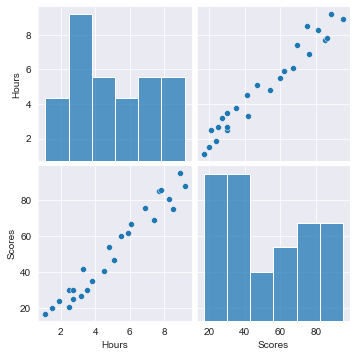

In [20]:
sns.pairplot(student_scores)

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  

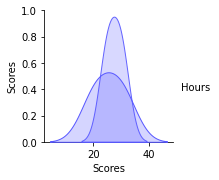

In [10]:
#Let's go for a pairplot to get brief insights of the data related to each other

sns.pairplot(student_scores,hue='Hours',palette='bwr')

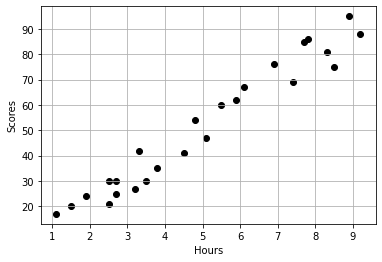

In [36]:
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(student_scores.Hours,student_scores.Scores, color='black')
plt.show()

<AxesSubplot:>

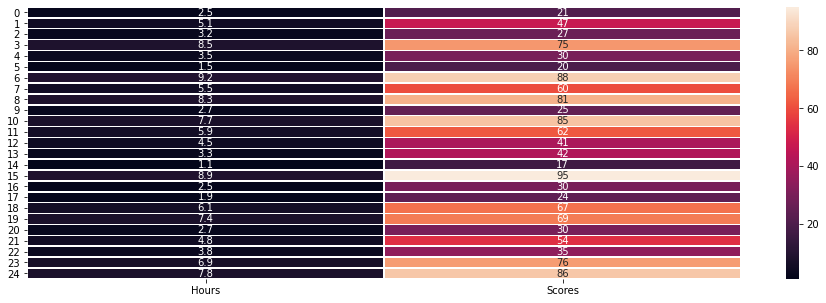

In [62]:
plt.figure(figsize = (16,5))
sns.heatmap(student_scores.iloc[:,:2], fmt='.2g', annot=True,linewidths=.5)

<AxesSubplot:>

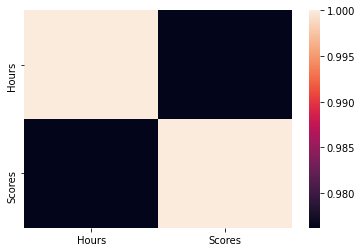

In [67]:
sns.heatmap(student_scores.corr())

As we can find that the maximum hour spend on the studies gave higest scores but to get a clear varification of a student studies for 9.25 hrs/ day? To squeeze this from the data set we need to check further. Let draw a heatmap to get a better understanding of the data.

The heat graph shows that the student who spend 2.5 hours in studies has lowest score of 21, while students spending above 6 hours has a great score as compared below with 1-6 hours. Let's train our dataset to get the exact prediction of student who spend 9.25hours/day.

# Training Linear Regression Model

In [11]:
#training-test method
X = student_scores.iloc[:, :-1].values  
y = student_scores.iloc[:, 1].values  

In [12]:
from sklearn import linear_model

# Creating & Training Model

In [13]:
reg = linear_model.LinearRegression()
#fit the training model
reg.fit(student_scores[['Hours']],student_scores.Scores)

LinearRegression()

# Model Evaluation

In [14]:
reg.coef_

array([9.77580339])

In [15]:
reg.intercept_

2.483673405373196

In [16]:
#value to be predicted 

x = 9.25


# Making Predictions

In [17]:
#using formula of linear regression though our data is 2D we will be using
#y=m*x+b

Line = reg.coef_*X+reg.intercept_

9.77580339*9.25+2.483673405373196

92.9098547628732

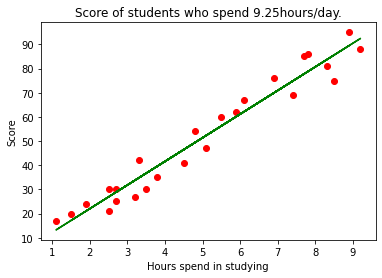

In [19]:
plt.scatter(X, y, color = "red")
plt.plot(X, Line, color = "green")
plt.title("Score of students who spend 9.25hours/day.")
plt.xlabel("Hours spend in studying")
plt.ylabel("Score")
plt.show()



#plt.scatter(X,y)
#plt.plot(X, Line);
#plt.show()

# Final Prediction

* As from the above graph, we came into conclusion of students who are stuying below 1_<4 hrs have minimum score ranging from (10-40)marks.
* While, Students who are spending more tham 4.5hr/day have tentatively have higher score ranging from the (41-100).
* But the final question was to predicted score if a student studies for 9.25 hrs/ day, so here from the above prediction model we can easily find it out that it gave **92.9098547628732** that means a student who is spending 9.25 hours a scores this much.

